# Home Work-5: Machine Learning
-Vinayak Bakshi

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as nplg
import scipy.sparse.linalg
%matplotlib inline

In [2]:
# Read all files
scores_df = pd.read_csv("CFB2016_scores.csv",delimiter = ",",header = None,names = ["A_index", "A_points", "B_index", "B_points"])
scores_mat = np.genfromtxt("CFB2016_scores.csv", delimiter = ",")
teams_df = pd.read_table("TeamNames.txt",header = None, names=["Team_Name"])

In [3]:
# Initialize M matrix

M = np.zeros((teams_df.shape[0],teams_df.shape[0]))

# Create M 
for i in xrange(scores_mat.shape[0]):
    
    M[int(scores_mat[i][0])-1][int(scores_mat[i][0])-1] = M[int(scores_mat[i][0])-1][int(scores_mat[i][0])-1] + int(scores_mat[i][1] > scores_mat[i][3]) + (1.0*scores_mat[i][1]/(scores_mat[i][1] + scores_mat[i][3]))
    M[int(scores_mat[i][2])-1][int(scores_mat[i][2])-1] = M[int(scores_mat[i][2])-1][int(scores_mat[i][2])-1] + int(scores_mat[i][1] < scores_mat[i][3]) + (1.0*scores_mat[i][3]/(scores_mat[i][1] + scores_mat[i][3]))
    M[int(scores_mat[i][0])-1][int(scores_mat[i][2])-1] = M[int(scores_mat[i][0])-1][int(scores_mat[i][2])-1] + int(scores_mat[i][1] < scores_mat[i][3]) + (1.0*scores_mat[i][3]/(scores_mat[i][1] + scores_mat[i][3]))
    M[int(scores_mat[i][2])-1][int(scores_mat[i][0])-1] = M[int(scores_mat[i][2])-1][int(scores_mat[i][0])-1] + int(scores_mat[i][1] > scores_mat[i][3]) + (1.0*scores_mat[i][1]/(scores_mat[i][1] + scores_mat[i][3]))

# Normalize M
for i in xrange(M.shape[0]):
    M[i] = M[i]/np.sum(M,axis = 1)[i]
    
# Find states
w_all = []
w_10000 = [] 

for t in [10,100,1000,10000]:
    
    w = (1.0/760)*np.ones(760)
    
    if t == 10000:
        for i in xrange(t):
            w = w.dot(M)
            w_10000.append(w)
        w_all.append(w)
        
    else:
        for i in xrange(t):
            w=w.dot(M)
        w_all.append(w)

## Solution 1(a)

In [4]:
# Get top Team names
Results_df = pd.DataFrame()
for i in range(4): 
    Results_df = pd.concat([Results_df,teams_df.iloc[np.argsort(w_all[i])[::-1][:25],:].reset_index().Team_Name],axis = 1)
    Results_df = pd.concat([Results_df,pd.Series(w_all[i][np.argsort(w_all[i])[::-1][:25]])],axis = 1)

Results_df.columns = ['t=10','weight','t=100','weight','t=1000','weight','t=10000','weight']
Results_df.index+=1
Results_df

,t=10,weight,t=100,weight,t=1000,weight,t=10000,weight
1,Mary Hardin-Baylor,0.014752,NW Missouri St,0.038258,Alabama,0.060719,Alabama,0.067282
2,NW Missouri St,0.013151,Alabama,0.033364,Clemson,0.060408,Clemson,0.066983
3,Alabama,0.012412,Clemson,0.032988,NW Missouri St,0.030495,Florida St,0.020835
4,Clemson,0.011029,Mary Hardin-Baylor,0.030883,Florida St,0.018814,Ohio State,0.019922
5,UW-Oshkosh,0.009925,UW-Oshkosh,0.016844,Ohio State,0.017983,Washington,0.017579
6,St Thomas,0.008178,UW-Whitewater,0.012160,Washington,0.015889,Virginia Tech,0.017524
7,UW-Whitewater,0.008168,Florida St,0.010444,Virginia Tech,0.015824,Michigan,0.016426
8,St Francis IN,0.008098,Grand Valley St,0.010261,Michigan,0.014827,NW Missouri St,0.016342
9,Mount Union,0.007755,John Carroll,0.010246,Pittsburgh,0.014651,Pittsburgh,0.016235
10,James Madison,0.007428,Ohio State,0.009941,Oklahoma,0.014390,Oklahoma,0.015922


## Solution 1(b)

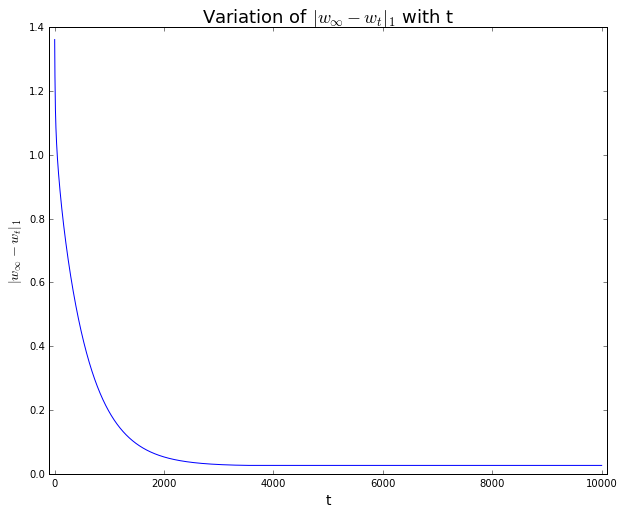

In [5]:
# Computing Eigen Vectors

w_inf = scipy.sparse.linalg.eigs(M.T,k=1,sigma=1.0)[1]
w_inf = w_inf/np.sum(w_inf)
w_inf_rep = np.tile(w_inf.reshape(760),(10000,1))
norms = nplg.norm(w_10000 - w_inf_rep,1,axis = 1)

_=plt.figure(figsize = (10,8))
_=plt.plot(range(10000),norms)
_=plt.xlim([-100,10100])
_=plt.title("Variation of $|w_\infty - w_t |_1$ with t", fontsize = 18)
_=plt.xlabel("t",fontsize = 14)
_=plt.ylabel("$|w_\infty - w_t |_1$",fontsize = 14)


## Solution - 2

In [6]:
# Parse File
file = open("nyt_data.txt","r") 
X = np.zeros((3012,8447))
c1 =0

for line in file.readlines():
    curr_line = line.split(",")
    
    for ele in curr_line:
        X[int(ele.split(":")[0])-1][c1] = ele.split(":")[1]
    c1 += 1


In [7]:
# Function to calculate objective function
def objective():
    err = (10**(-16))
    WH = W.dot(H)
    I = np.ones(WH.shape)
    obj = X*np.log(I/(WH + err)) + WH
    return np.sum(obj)

In [8]:
#Initialize W and H
W = []
H= []

for i in range(X.shape[0]):
    W.append(np.random.uniform(1,2,25))
W = np.array(W)

for i in range(X.shape[1]):
    H.append(np.random.uniform(1,2,25))
H = (np.array(H)).T

obj_all=[]
err = (10**(-16))
for iter in range(100):
    H = H * ((W.T/np.sum(W.T,axis =1)[:,np.newaxis]).dot(X/(W.dot(H)+err)))
    W = W *((X/(W.dot(H)+err)).dot(H.T/np.sum(H.T,axis =0)[np.newaxis,:]))
    obj_all.append(objective())    

## Solution 2(a)

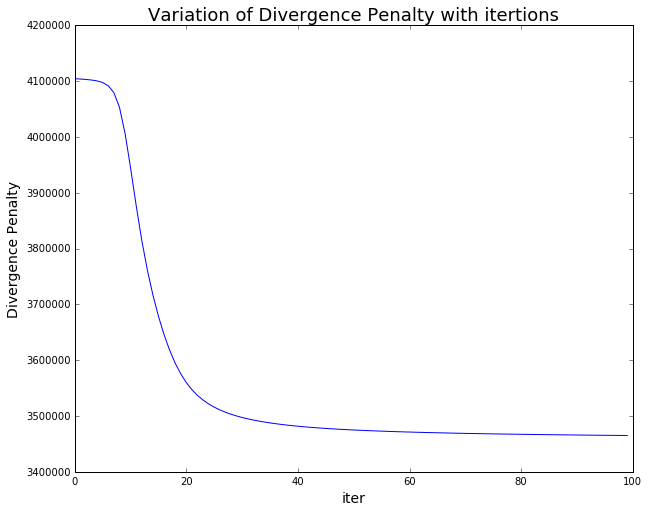

In [9]:
_=plt.figure(figsize = (10,8))
_=plt.title("Variation of Divergence Penalty with itertions", fontsize = 18)
_=plt.xlabel("iter",fontsize = 14)
_=plt.ylabel("Divergence Penalty",fontsize = 14)
_=plt.plot(range(100),obj_all)

## Solution 2 (b)

In [10]:
W_norm = (W/np.sum(W,axis =0)[np.newaxis,:])

# Get Top Weights
weights_ind = np.around(np.sort(W_norm,axis =0)[-10:,:].T,decimals = 6)

# Get Top weighted Words' index
words_ind = np.argsort(W_norm,axis = 0)[-10:,:].T

# Read vocab
vocab = pd.read_table("nyt_vocab.dat",delimiter = ",",header = None)


In [20]:
pd.Series(weights_ind[0][::-1])

0    0.037702
1    0.022457
2    0.018248
3    0.014681
4    0.014605
5    0.012333
6    0.012312
7    0.012165
8    0.010989
9    0.010761
dtype: float64

In [21]:
Results_df = pd.DataFrame()
for i in range(25):
    Results_df = pd.concat([Results_df, vocab.iloc[words_ind[i][::-1],:].reset_index(),pd.Series(weights_ind[i][::-1])], axis = 1)

In [23]:
Results_df.to_csv("topics.csv")

In [442]:
# Create 5 x 5 matrix of topics

mat_topics = [] 
temp = []

for i in range(25):
    
    b = list(np.fliplr(weights_ind)[i])
    c = list((np.char.array(vocab.iloc[np.fliplr(words_ind)[i],:])).reshape(10,))
    topic = [m+'-'+str(n) for m,n in zip(c,b)]
    temp.append(','.join(topic))
    
    if len(temp)==5:
        mat_topics.append(temp)
        temp = []

(pd.DataFrame(np.array(mat_topics)))

,0,1,2,3,4
0,"win-0.023384,second-0.020805,game-0....","art-0.016707,artist-0.011283,design-...","leader-0.016,official-0.012855,gover...","school-0.021623,program-0.018102,stu...","city-0.021365,building-0.017504,resi..."
1,"campaign-0.018338,political-0.017479...","computer-0.014007,system-0.01165,inf...","pay-0.019962,tax-0.01557,cut-0.01497...","tell-0.009134,ask-0.008597,car-0.008...","father-0.043486,mother-0.036408,son-..."
2,"life-0.013482,book-0.0098,man-0.0090...","team-0.021815,player-0.019134,game-0...","police-0.034612,man-0.02282,officer-...","television-0.027926,write-0.01418,ne...","charge-0.017072,case-0.015408,lawyer..."
3,"company-0.028379,stock-0.018477,shar...","music-0.018394,play-0.016357,perform...","official-0.011091,kill-0.010233,mile...","company-0.034818,executive-0.019276,...","health-0.021547,drug-0.016278,doctor..."
4,"percent-0.032488,rate-0.017395,rise-...","law-0.024319,rule-0.019437,court-0.0...","american-0.034215,states-0.027311,co...","food-0.020835,serve-0.011243,restaur...","water-0.013519,foot-0.008597,wear-0...."
